# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  50191      0 --:--:-- --:--:-- --:--:-- 50411']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(x*y for x,y in zip(array1,array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1+math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weight,instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return int(output(weights,instance)>=0.5)


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # Initialization
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # Error Calculation for Gradient Descent
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            # Weight Updation
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




Using predict function results in 2 discrete values 0 and 1, but the actual output of the perceptron may be any value between these two values. When we train the model we need the actual output values before thresholding as they give a better indication of how different the output is from the actual value. This also helps adjust weights gradually and prevents overshooting. Also, for discrete values like 0, the weight updates also come out to be zero, which is not useful.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100]  # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]  # number of epochs
lr_values = [0.005, 0.01, 0.05]  # learning rate
accuracy_values = {}

for size in tr_percent:
    instances=instances_tr[:len(instances_tr*size)//100]
    for lr in lr_values:
        for epochs in num_epochs:
            weights = train_perceptron(instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)

            print(f"# tr: {len(instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
            accuracy_values[(size, lr, epochs)] = accuracy

# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
# tr:  20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
# tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 14 instances): 71.4
# tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 14 instances): 85.7
# tr:  20, epoch

In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



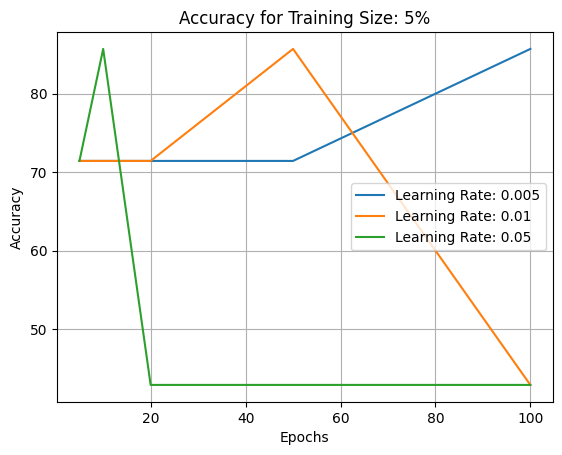

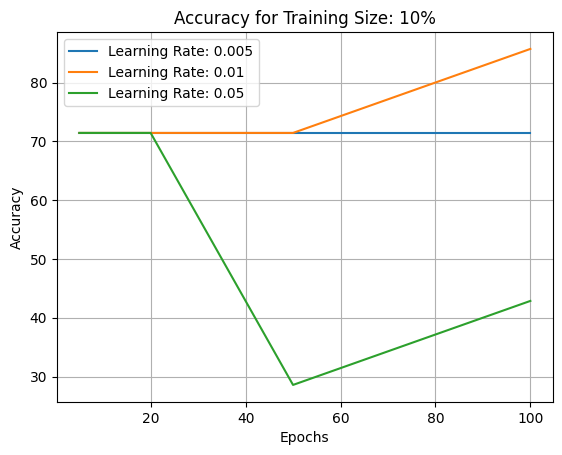

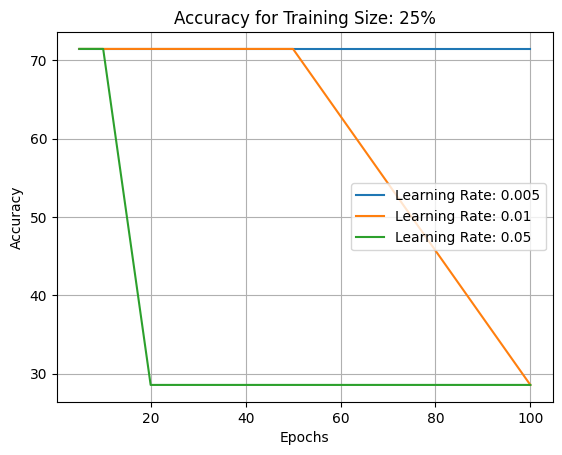

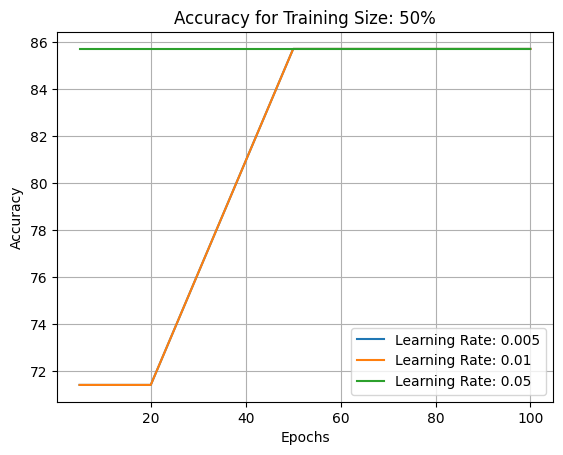

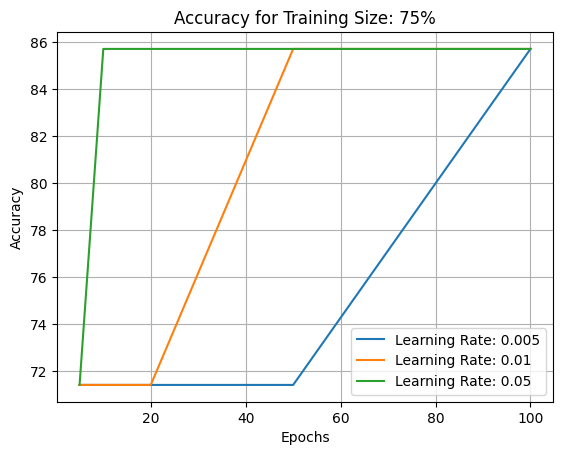

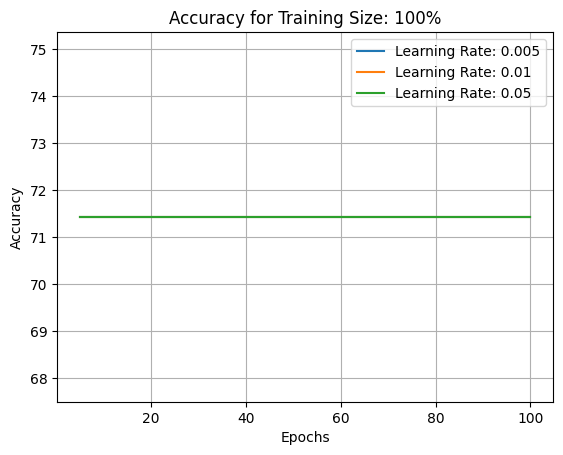

In [7]:
import matplotlib.pyplot as plt
for size in tr_percent:
    plt.figure()
    plt.title(f"Accuracy for Training Size: {size}%")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    for lr in lr_values:
        accuracies = [accuracy_values[(size, lr, epochs)] for epochs in num_epochs]
        plt.plot(num_epochs, accuracies, label=f"Learning Rate: {lr}")
    plt.legend()
    plt.grid(True)
    plt.show()

Based on the graphs, it can be inferred that most of the models show improved accuracy on increasing the number of epochs.<br><br>
There are a few exceptions to this trend. <br>
The models with larger learning rates and very small amount of data tend to reach the highest possible accuracy sooner but get very small accuracy on increasing epochs, showing signs of overfitting. This trend is apparent in models with only 5%, 10%, and 25% of training data.
<br><br>
For Models with larger amount of data, they show an increase in accuracy even with larger learning rates, indicating that the larger learning rates can be useful to train larger models more quickly saving time and resources.
<br><br>
The results for 100% training data indicate that it is not always preferable to have a very large dataset, as it may need a lot of epochs for the model to train on a large dataset. Also, the model may not reach an as good accuracy as a subset of data may achieve in a shorter time.

- A.<br>
No, it is not necessary to train on the whole dataset to get highest accuracy for this dataset. on the contrary, using the whole dataset goes not even get the highest accuracy for the specified number of epochs. This can be due to underfitting and presence of outliers.
<br><br>
- B. <br>
There can be 2 reasons for second run to have worse accuracy.
  <br>1. The first run has a learning rate of 0.05 which is 10 times the learning rate of the second run. This combined with the fact the the first run has less data may have allowed it to learn the trends faster thus having a higher accuracy, the second run would likely be underfitting.
  <br>2. The other reason may be the data has many outliers in the values added by second run, which resulted in a poorer model.
<br><br>
- C.
<br>
The highest possible accuracy using the given combinations of hyperparameters already reaches upto 85.7% but, it may be possible to have even higher accuracy by carefully tuning the hyperparameters.
<br><br>
- D.<br>
Training for more epochs is not always a good thing as the model will likely overfit at some time. For less data, the model may even overfit in 5 or 10 epochs. this trend can directly be observed in the plotted graphs.